In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_excel("tumor-data.xlsx")

In [4]:
data = data.drop(["Unnamed: 6", "Unnamed: 0", "Unnamed: 2"], axis=1)

In [5]:
labels = [value for column, value in data.iloc[0].items()]

In [6]:
data = data.set_axis(labels, axis=1)
data = data.drop(index=0)
data

,Ф.И.О.,"1-адренокортикальный рак, 2- аденома,0 -здоровые",Гормональная активность 0-нет 1-да,"Пол: 0-жен, 1-муж","Максимальный размер, мм","Нативная плотность, НU",APW % КВ - коэф вымывания,Weiss,Ki-67,Кортизол слюны,...,11An_11Et,THE_THS,THE_11oxoP3,16-OHdP2-3a/16-OHdP2-3b,11dP3,dP3-3b,5b-А2,21dP2,6P,ННА
1,Архипова,1,1,0,181,NaN,NaN,7,NaN,NaN,...,2.827039,0.312336,334.2,1.205818,4200,2900,NaN,30,NaN,NaN
2,Бикбова,1,1,0,137,NaN,NaN,6,60,71,...,0.670094,8.016807,353.903226,0.795526,715,600,16,NaN,NaN,217
3,Бутанова-2,1,1,0,79,48,NaN,4,20,NaN,...,1.78,16.68,25.01,2.53,1408,5000,NaN,NaN,NaN,NaN
4,ВBeg,1,1,0,NaN,NaN,64.583333,NaN,NaN,NaN,...,1.98324,1.279727,85.121212,1.4225,255,2470,NaN,NaN,NaN,NaN
5,Вертова Я.Г.,1,1,0,159,33,NaN,7,NaN,NaN,...,2.184953,3.832331,37.755556,0.836623,565,NaN,690,NaN,175,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,тасс-м,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,1.527972,43.724138,NaN,0,NaN,0,154,NaN,NaN,NaN
192,фадеев-м,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,2.546667,41.869565,267.5,0,NaN,0,NaN,NaN,NaN,NaN
193,2 м,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,2.759701,117.577778,59.449438,0,NaN,0,309,NaN,NaN,NaN
194,2а м,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,2.358333,53.213115,72.133333,0,NaN,0,NaN,NaN,NaN,NaN


In [11]:
null_data_coefficients = data.isna().sum() / len(data) * 100
null_data_coefficients

1-адренокортикальный рак, 2- аденома,0 -здоровые     2.051282
Гормональная активность 0-нет               1-да     8.205128
Пол:    0-жен, 1-муж                                 5.128205
Максимальный размер, мм                             28.205128
Нативная плотность, НU                              43.589744
                                                      ...    
dP3-3b                                              53.333333
5b-А2                                               52.820513
21dP2                                               88.205128
6P                                                  81.538462
ННА                                                 73.846154
Length: 100, dtype: float64

In [8]:
data = data[data.columns[1:]].apply(
    lambda x: pd.to_numeric(x.replace('<', '').replace(',', '.'), errors='coerce')
)

In [9]:
data_encoded = pd.get_dummies(data, columns=["1-адренокортикальный рак, 2- аденома,0 -здоровые"], prefix="disease",
    prefix_sep="_")
data_encoded.rename(columns={'disease_0.0': "healthy",
                             'disease_1.0': "cancer",
                             'disease_2.0': "adenoma"}, inplace=True)

In [10]:
data_cleaned = data_encoded.dropna(how='all')

In [10]:
data_cleaned.corr()

,Гормональная активность 0-нет 1-да,"Пол: 0-жен, 1-муж","Максимальный размер, мм","Нативная плотность, НU",APW % КВ - коэф вымывания,Weiss,Ki-67,Кортизол слюны,Свободный кортизол мочи (ХЛА),Кортизол крови утро,...,16-OHdP2-3a/16-OHdP2-3b,11dP3,dP3-3b,5b-А2,21dP2,6P,ННА,healthy,cancer,adenoma
Гормональная активность 0-нет 1-да,1.000000,-0.107793,-0.225926,-0.122105,0.225797,-0.080209,0.107393,0.374329,0.388594,0.248587,...,0.235226,0.019512,0.315723,0.122368,-0.298835,0.072579,0.228619,-0.382740,0.035772,0.244104
"Пол: 0-жен, 1-муж",-0.107793,1.000000,0.148558,-0.017619,-0.017631,0.026824,0.130325,0.057538,0.013754,0.075264,...,-0.045288,-0.081835,-0.097431,0.107236,-0.220404,0.006738,-0.192047,0.110745,0.039507,-0.118717
"Максимальный размер, мм",-0.225926,0.148558,1.000000,0.381553,-0.154607,0.636790,0.517100,-0.052469,0.136067,0.151248,...,0.116735,0.156506,0.125373,0.504071,0.033668,0.141237,0.162948,NaN,0.632294,-0.632294
"Нативная плотность, НU",-0.122105,-0.017619,0.381553,1.000000,0.120740,0.452552,0.372753,0.180606,0.241422,0.122469,...,-0.179313,0.274364,0.279511,0.359748,0.028715,0.446444,0.031128,NaN,0.538831,-0.538831
APW % КВ - коэф вымывания,0.225797,-0.017631,-0.154607,0.120740,1.000000,-0.088364,0.191969,-0.095525,-0.109771,0.116562,...,-0.027555,0.074654,0.008557,-0.251771,-0.310809,-0.210671,-0.116137,NaN,-0.126842,0.126842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6P,0.072579,0.006738,0.141237,0.446444,-0.210671,0.473809,0.426799,0.009656,0.001668,-0.083163,...,-0.254566,-0.126777,0.515409,0.264434,-0.092170,1.000000,0.051551,NaN,0.070482,-0.070482
ННА,0.228619,-0.192047,0.162948,0.031128,-0.116137,0.075361,0.688747,-0.022765,0.166684,0.032522,...,0.560864,0.090903,0.050002,-0.173902,0.913002,0.051551,1.000000,-0.222167,0.120750,0.066387
healthy,-0.382740,0.110745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.476728,NaN,-0.267426,-0.143718,NaN,NaN,-0.222167,1.000000,-0.341521,-0.352493
cancer,0.035772,0.039507,0.632294,0.538831,-0.126842,0.820270,0.416550,0.089210,0.301109,0.171253,...,0.301367,0.173868,0.341497,0.410639,0.273152,0.070482,0.120750,-0.341521,1.000000,-0.718003


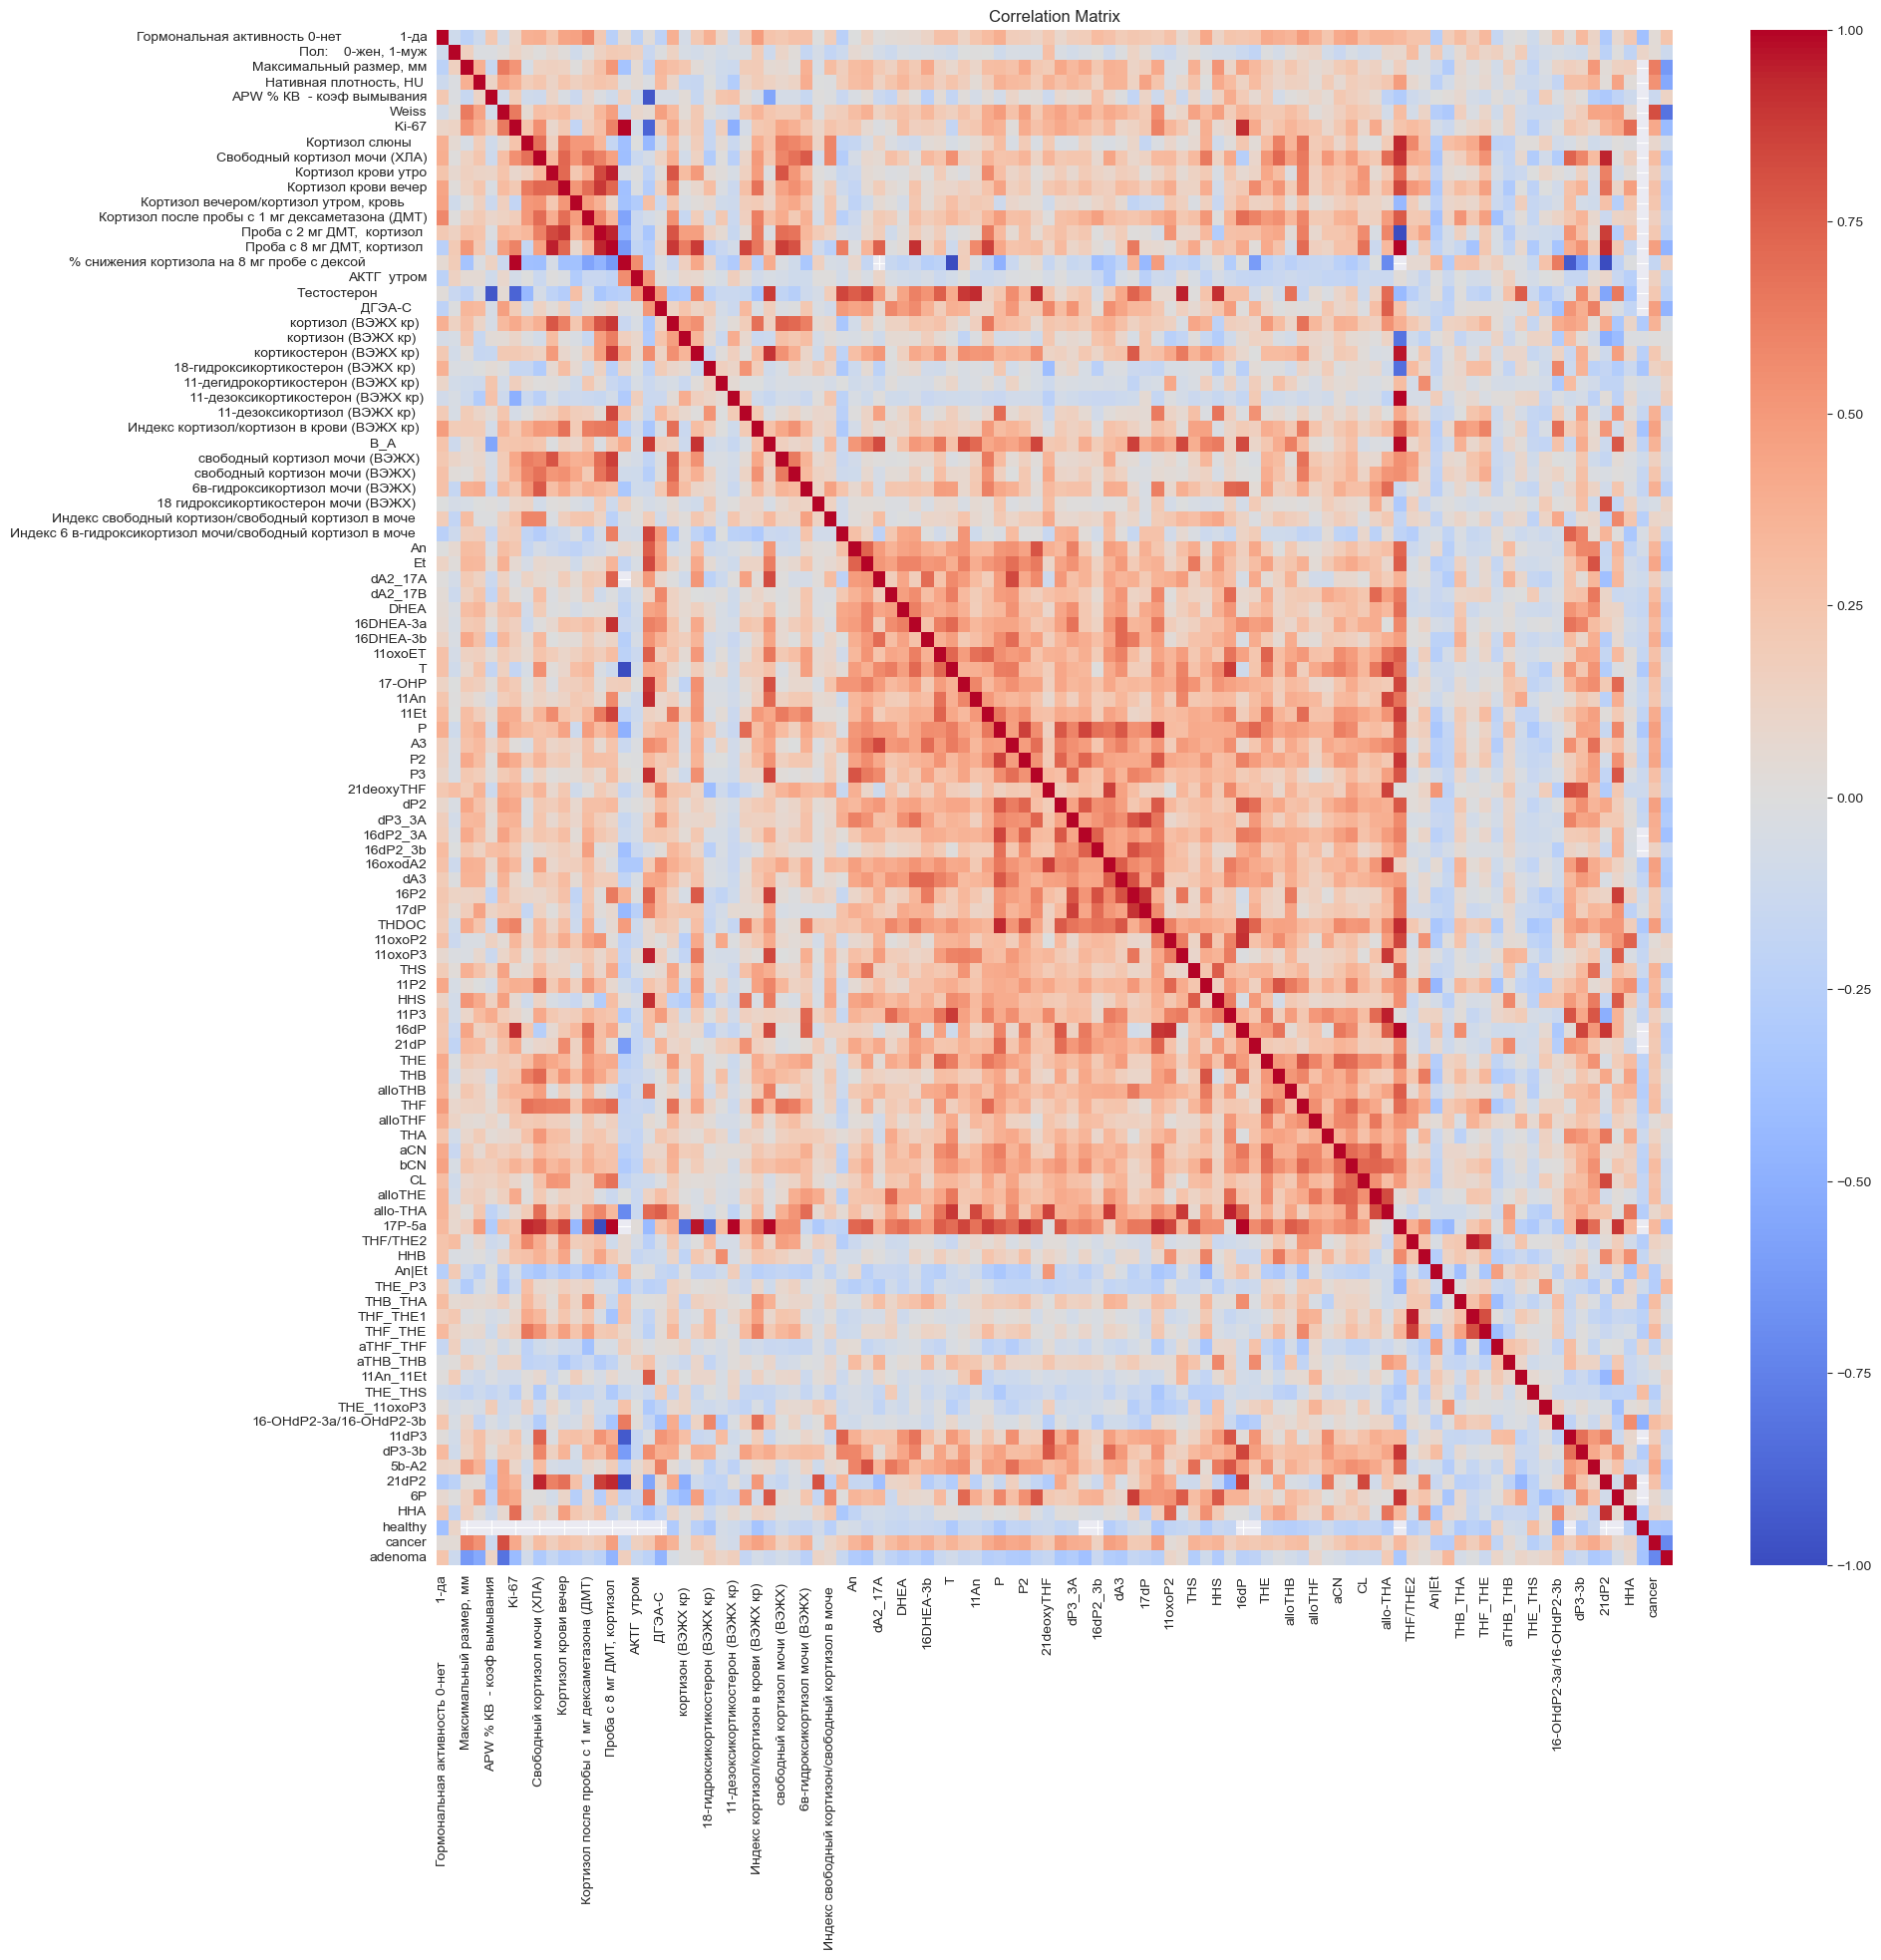

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data_cleaned.corr()

plt.figure(figsize=(20, 20))

sns.heatmap(correlation_matrix, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()

In [11]:
#dropping useless near 0 correlation features

data_cleaned.drop(["Пол:    0-жен, 1-муж", ""], axis=1, inplace=True)

In [12]:
X = data_cleaned.drop(columns=["cancer", "adenoma", "healthy", "16-OHdP2-3a/16-OHdP2-3b", ])
y = np.argmax(data_cleaned[["cancer", "adenoma", "healthy"]], axis=1)

In [179]:
classes, counts = np.unique(y, return_counts=True)
for class_label, count in zip(["cancer", "adenoma", "healthy"], counts):
    print(f"{class_label}: {count}")

cancer: 84
adenoma: 83
healthy: 28


In [13]:
X["Гормональная активность 0-нет               1-да"] = X["Гормональная активность 0-нет               1-да"].astype(str)
X["Гормональная активность 0-нет               1-да"] = X["Гормональная активность 0-нет               1-да"].fillna("missing")

In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [160]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(loss_function="MultiClass",
                           cat_features = ["Гормональная активность 0-нет               1-да"],
                           verbose=10,
                           thread_count=-1)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'learning_rate': [0.005, 0.01, 0.1, 0.5],
    'depth': [6, 8, 10, 12],
    'l2_leaf_reg': [1, 3, 5],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

In [162]:
""" best params after GridSearchCV """

best_params = {'depth': 8, 'iterations': 40, 'l2_leaf_reg': 5, 'learning_rate': 0.5}

In [182]:
best_model = CatBoostClassifier(**best_params,
                                loss_function="MultiClass",
                                custom_loss=["AUC", "Accuracy"],
                                cat_features = ["Гормональная активность 0-нет               1-да"],
                                verbose=10,
                                thread_count=-1,
                                classes_count=3,
                                bootstrap_type='Bernoulli')

In [183]:
best_model.fit(X_train, y_train,
               eval_set=(X_test, y_test),
               plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9466303	test: 0.9672811	best: 0.9672811 (0)	total: 49.4ms	remaining: 1.93s
10:	learn: 0.3322344	test: 0.5126518	best: 0.5126518 (10)	total: 509ms	remaining: 1.34s
20:	learn: 0.1590143	test: 0.3494558	best: 0.3494558 (20)	total: 1.08s	remaining: 979ms
30:	learn: 0.1030570	test: 0.2946939	best: 0.2946939 (30)	total: 1.71s	remaining: 495ms
39:	learn: 0.0758879	test: 0.2633459	best: 0.2633459 (39)	total: 2.16s	remaining: 0us

bestTest = 0.2633459207
bestIteration = 39



In [184]:
y_pred = best_model.predict(X_test)

In [185]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy: 0.9322033898305084
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.92      0.92      0.92        26
           2       1.00      1.00      1.00         7

    accuracy                           0.93        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.93      0.93      0.93        59



In [186]:
feature_importances = best_model.get_feature_importance()
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
4,Weiss,20.036160
91,16-OHdP2-3a/16-OHdP2-3b,7.682601
3,APW % КВ - коэф вымывания,6.957030
93,dP3-3b,5.747680
1,"Максимальный размер, мм",4.821753
...,...,...
14,% снижения кортизола на 8 мг пробе с дексой ...,0.000000
12,"Проба с 2 мг ДМТ, кортизол",0.000000
9,Кортизол крови вечер,0.000000
7,Свободный кортизол мочи (ХЛА),0.000000


In [187]:
from sklearn.metrics import roc_auc_score

y_proba = best_model.predict_proba(X_test)

roc = roc_auc_score(y_test, y_proba, multi_class="ovo")
roc

0.9953155818540433

In [ ]:
"""

Небольшие пояснения главных фичей

Weiss — это шкала, используемая для прогноза опухолей, особенно в контексте адренокортикальных карцином (раков надпочечников)

АКТГ (Адренокортикотропный гормон) — это гормон, который вырабатывается в передней доле гипофиза. Он регулирует деятельность надпочечников, в частности, стимулирует выработку кортизола.

16-OHdP — это метаболит 16-гидроксипрогестерона (16-OH-прогестерона), который является производным прогестерона и может быть связан с функцией надпочечников.

APW % КВ  - коэф вымывания - скорость или степени вымывания контрастного вещества или радиофармпрепаратов из опухоли и окружающих тканей. Это может быть использовано для диагностики, оценки агрессивности опухоли, а также для мониторинга эффективности лечения.

Тетрагидрокортикостерон (Tetrahydrocorticosterone, THB) — это метаболит кортикостероидов, который является продуктом биотрансформации кортизола.

"""